In [2]:
import pandas as pd

# Load dataset (Excel file)
df = pd.read_excel(r'C:\Users\raj\Downloads\winequality-red dataset.xlsx')

# Inspect first 5 rows
print(df.head())

# Check missing values
print(df.isnull().sum())

# Fill missing values with column mean (if any)
df.fillna(df.mean(), inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Check data types
print(df.dtypes)

# Optional: Rename columns (remove spaces)
df.columns = [col.replace(' ', '_') for col in df.columns]

# Save cleaned dataset
df.to_csv('winequality-red-cleaned.csv', index=False)


   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

What this will give you:

Histograms → Check the distribution of each feature (normal, skewed, etc.).

Boxplots → Identify potential outliers.

Correlation heatmap → See which features are positively/negatively correlated with wine quality.

Scatterplots → Visualize relationships between key features and quality.

Pairplot → Explore multivariate relationships and patterns between features.

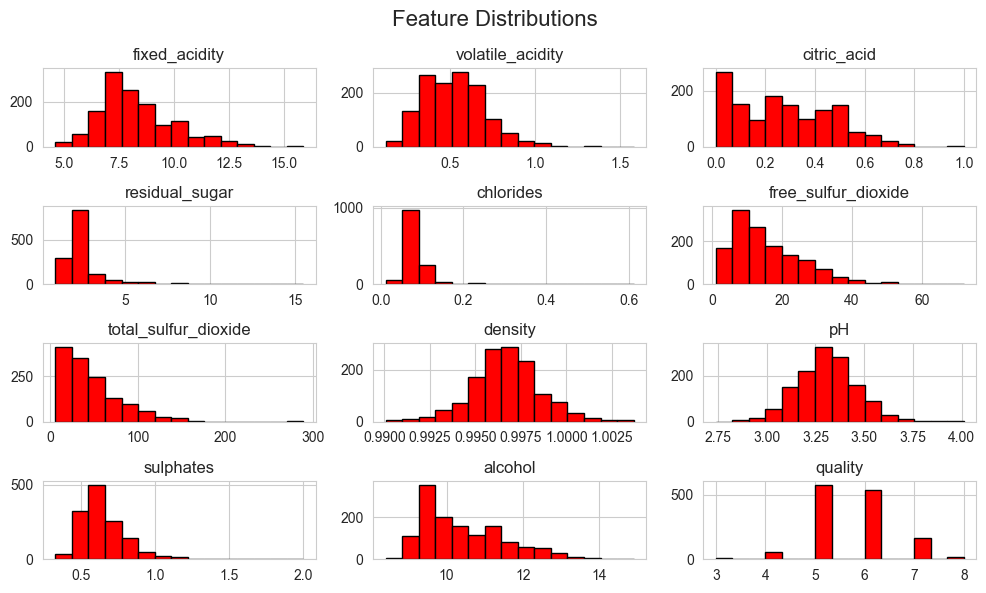

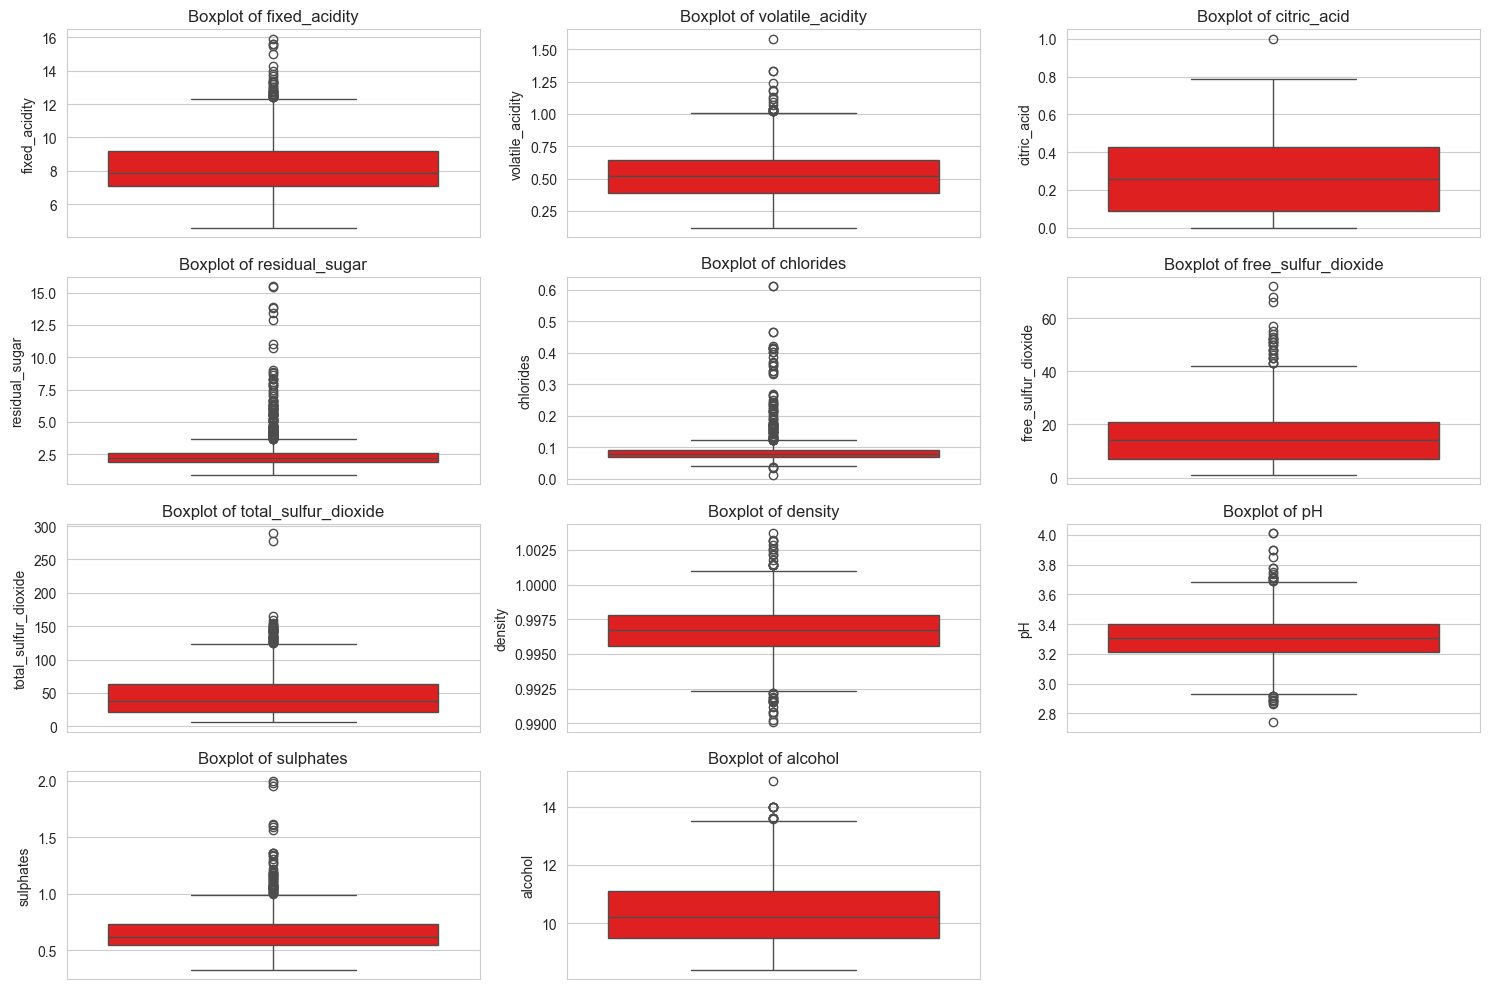

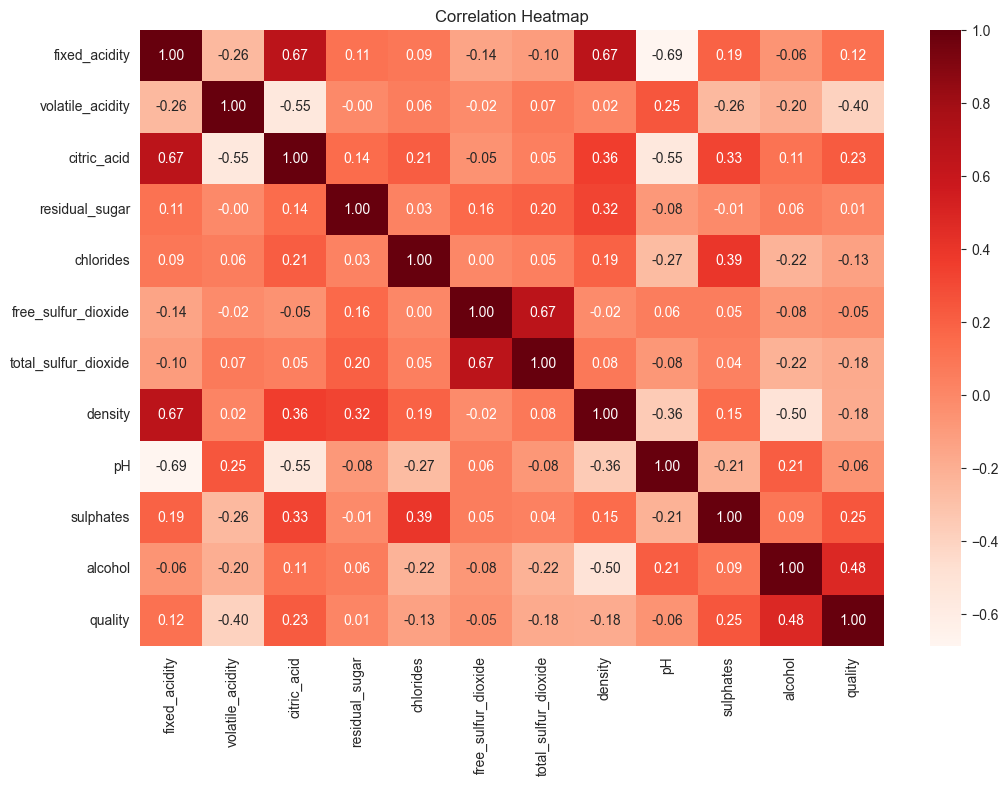

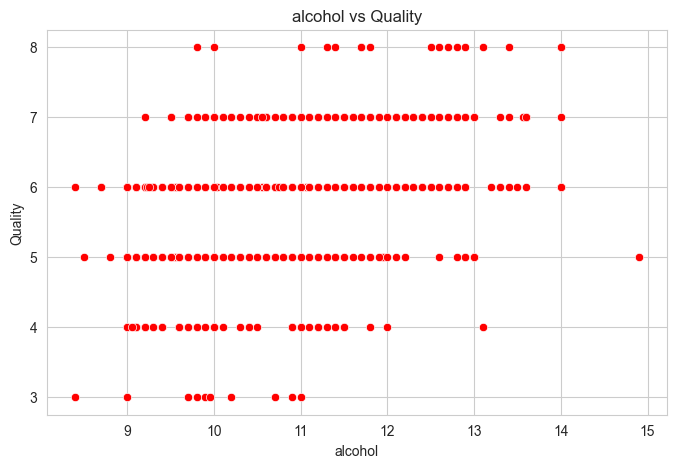

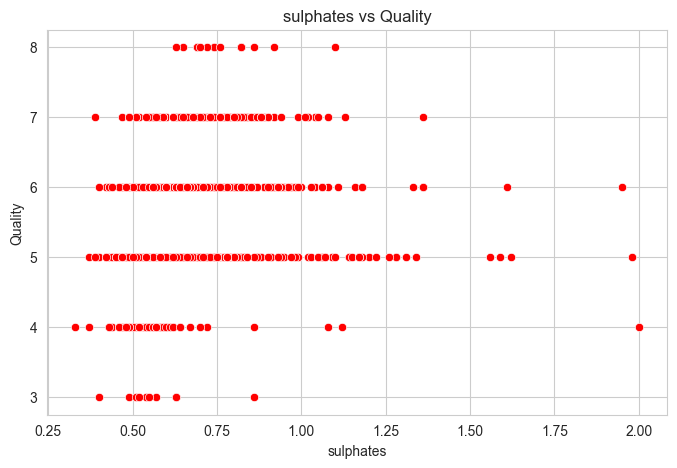

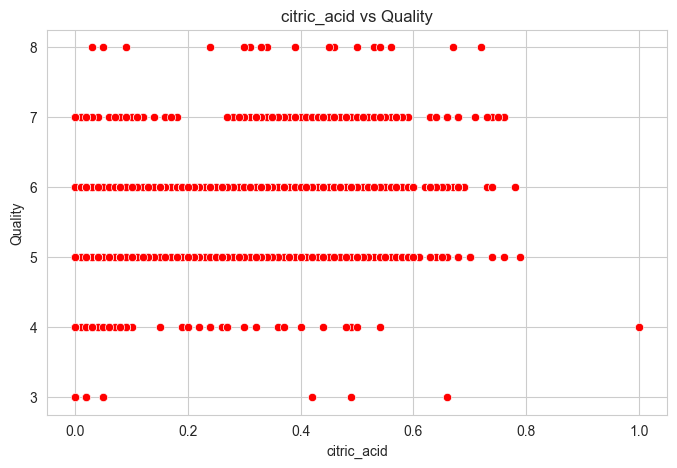

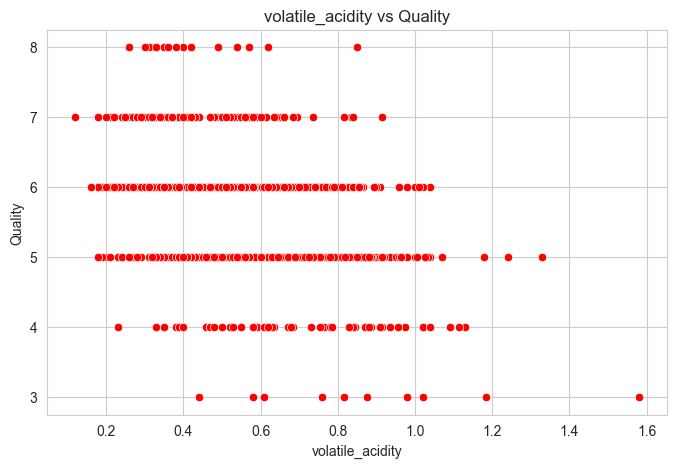

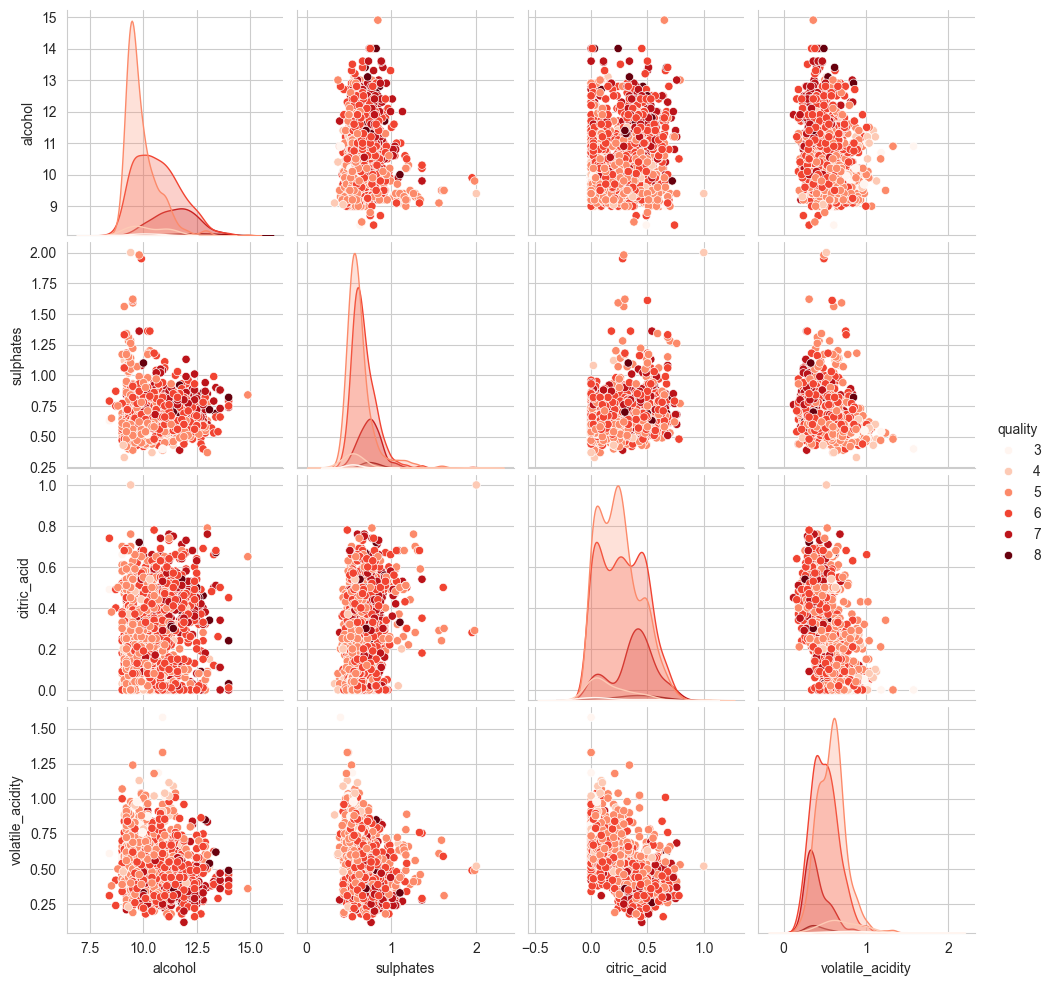

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load cleaned dataset
df = pd.read_csv('winequality-red-cleaned.csv')

# Set style for plots
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (10,6)

# 1️⃣ Histograms for each feature (red)
df.hist(bins=15, color='red', edgecolor='black', layout=(4,3))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()

# 2️⃣ Boxplots to check outliers (red)
plt.figure(figsize=(15,10))
for i, col in enumerate(df.columns[:-1], 1):  # Exclude 'quality' for now
    plt.subplot(4,3,i)
    sns.boxplot(y=df[col], color='red')
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

# 3️⃣ Correlation heatmap (red)
plt.figure(figsize=(12,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='Reds', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 4️⃣ Scatterplots for interesting features vs quality (red)
interesting_features = ['alcohol', 'sulphates', 'citric_acid', 'volatile_acidity']
for feature in interesting_features:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[feature], y=df['quality'], color='red')
    plt.title(f"{feature} vs Quality")
    plt.xlabel(feature)
    plt.ylabel("Quality")
    plt.show()

# 5️⃣ Pairplot for selected features (red palette)
sns.pairplot(df[['alcohol','sulphates','citric_acid','volatile_acidity','quality']], 
             hue='quality', palette='Reds', diag_kind='kde')
plt.show()


Feature importance based on correlation:
 alcohol                 0.480343
volatile_acidity        0.395214
sulphates               0.248835
citric_acid             0.228057
density                 0.184252
total_sulfur_dioxide    0.177855
chlorides               0.130988
fixed_acidity           0.119024
pH                      0.055245
free_sulfur_dioxide     0.050463
residual_sugar          0.013640
Name: quality, dtype: float64


C:\Users\raj\AppData\Local\Temp\ipykernel_13200\1256313994.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='Reds_r')


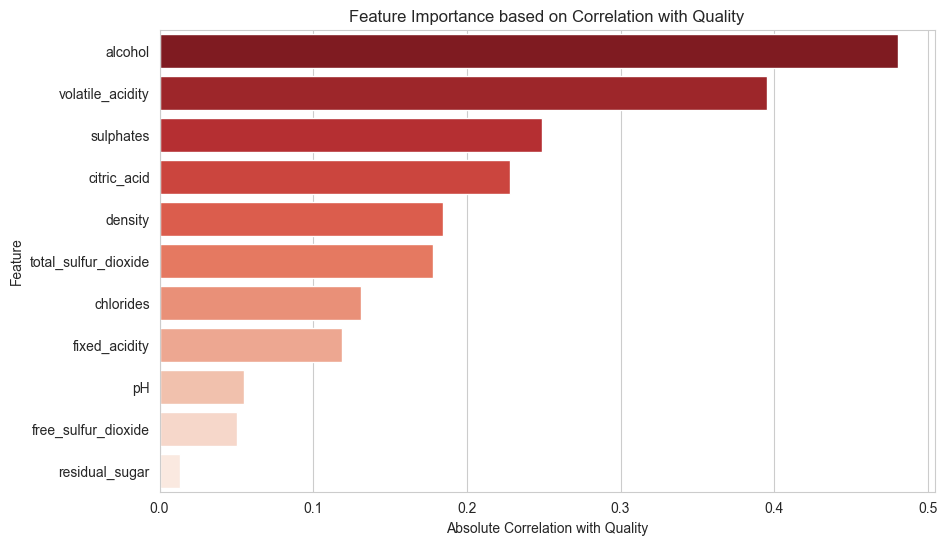

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv('winequality-red-cleaned.csv')

# Compute correlation with target (quality)
corr_with_quality = df.corr()['quality'].drop('quality')  # drop quality itself

# Sort features by absolute correlation
corr_sorted = corr_with_quality.abs().sort_values(ascending=False)
print("Feature importance based on correlation:\n", corr_sorted)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=corr_sorted.values, y=corr_sorted.index, palette='Reds_r')
plt.title("Feature Importance based on Correlation with Quality")
plt.xlabel("Absolute Correlation with Quality")
plt.ylabel("Feature")
plt.show()


Feature importance from Random Forest:
 alcohol                 0.275795
sulphates               0.139023
volatile_acidity        0.130129
total_sulfur_dioxide    0.078042
chlorides               0.061949
residual_sugar          0.059462
pH                      0.056704
fixed_acidity           0.052806
density                 0.050105
citric_acid             0.048089
free_sulfur_dioxide     0.047894
dtype: float64


C:\Users\raj\AppData\Local\Temp\ipykernel_13200\1117979242.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances.values, y=importances.index, palette='Reds_r')


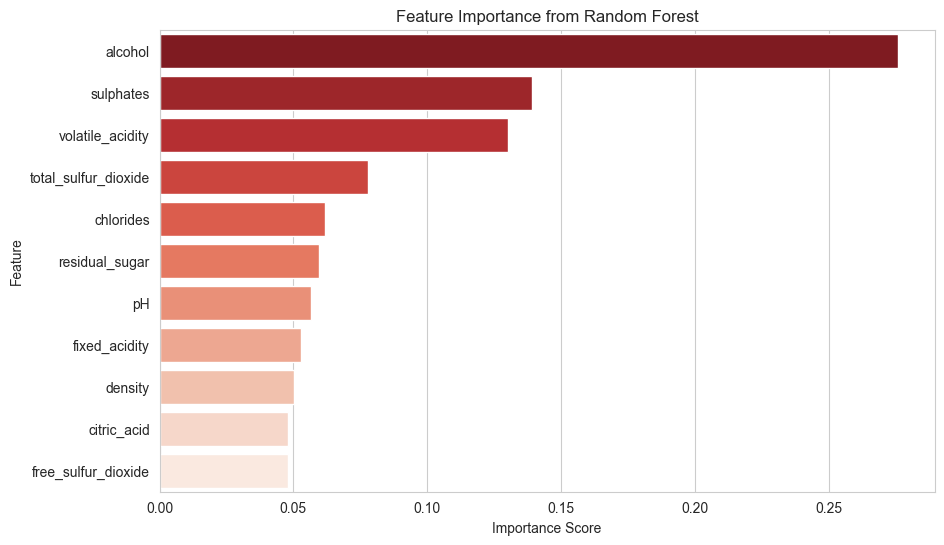

In [4]:
from sklearn.ensemble import RandomForestRegressor

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X, y)

# Get feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Feature importance from Random Forest:\n", importances)

# Bar chart
plt.figure(figsize=(10,6))
sns.barplot(x=importances.values, y=importances.index, palette='Reds_r')
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load dataset
df = pd.read_csv('winequality-red-cleaned.csv')

# Features and target
X = df.drop('quality', axis=1)
y = df['quality']


Regression Results:
RMSE: 0.62
R² Score: 0.46


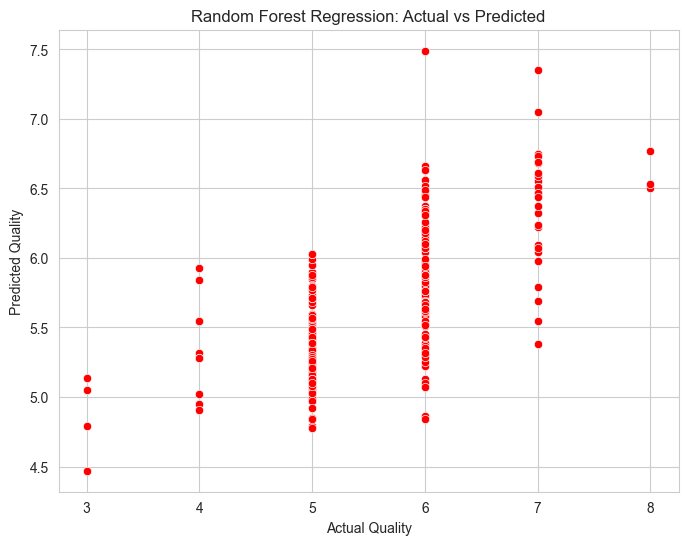

In [7]:
# Split dataset (Regression)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Regressor
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict
y_pred = rf_reg.predict(X_test)

# Evaluation
from math import sqrt

rmse = sqrt(mean_squared_error(y_test, y_pred))

r2 = r2_score(y_test, y_pred)

print(f"Regression Results:\nRMSE: {rmse:.2f}\nR² Score: {r2:.2f}")

# Optional: plot actual vs predicted
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='red')
plt.xlabel("Actual Quality")
plt.ylabel("Predicted Quality")
plt.title("Random Forest Regression: Actual vs Predicted")
plt.show()


Classification Accuracy: 0.85

Confusion Matrix:
[[  0  15   0]
 [  0 216   7]
 [  0  20  14]]


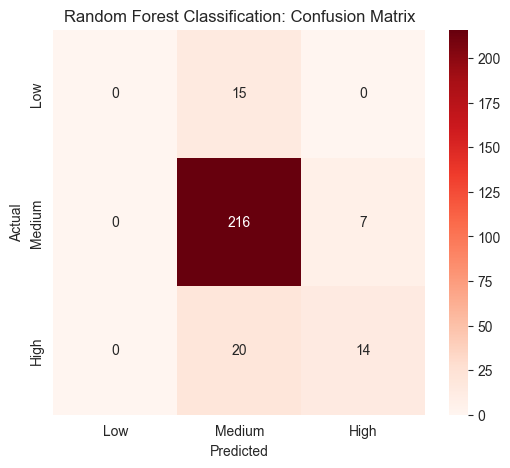


Classification Report:
               precision    recall  f1-score   support

        High       0.67      0.41      0.51        34
         Low       0.00      0.00      0.00        15
      Medium       0.86      0.97      0.91       223

    accuracy                           0.85       272
   macro avg       0.51      0.46      0.47       272
weighted avg       0.79      0.85      0.81       272



c:\Users\raj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\raj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\raj\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, 

In [8]:
# Categorize quality
def categorize_quality(q):
    if q <= 4:
        return 'Low'
    elif q <= 6:
        return 'Medium'
    else:
        return 'High'

y_class = y.apply(categorize_quality)

# Split dataset (Classification)
X_train, X_test, y_train, y_test = train_test_split(X, y_class, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predict
y_pred = rf_clf.predict(X_test)

# Evaluation
acc = accuracy_score(y_test, y_pred)
print(f"Classification Accuracy: {acc:.2f}")
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred, labels=['Low','Medium','High'])
print(cm)

# Plot confusion matrix
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds', xticklabels=['Low','Medium','High'], yticklabels=['Low','Medium','High'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Classification: Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_test, y_pred))


In [9]:
# Categorize wines
def wine_quality_category(q):
    if q <= 4:
        return 'Poor'
    elif q <= 6:
        return 'Medium'
    else:
        return 'Excellent'

df['Quality_Label'] = df['quality'].apply(wine_quality_category)
df['Quality_Label'].value_counts()


Quality_Label
Medium       1112
Excellent     184
Poor           63
Name: count, dtype: int64

In [10]:
# Average feature values by quality
feature_means = df.groupby('Quality_Label').mean()
print(feature_means)


               fixed_acidity  volatile_acidity  citric_acid  residual_sugar  \
Quality_Label                                                                 
Excellent           8.820109          0.405870     0.372880        2.703804   
Medium              8.251169          0.538898     0.261286        2.484397   
Poor                7.871429          0.724206     0.173651        2.684921   

               chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density  \
Quality_Label                                                                   
Excellent       0.076049            13.972826             35.358696  0.995963   
Medium          0.089691            16.428058             49.424910  0.996834   
Poor            0.095730            12.063492             34.444444  0.996689   

                     pH  sulphates    alcohol   quality  
Quality_Label                                            
Excellent      3.288587   0.745598  11.552808  7.092391  
Medium         3.309083 

C:\Users\raj\AppData\Local\Temp\ipykernel_13200\3870127005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quality_Label', y=feature, data=df, palette='Reds')
C:\Users\raj\AppData\Local\Temp\ipykernel_13200\3870127005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quality_Label', y=feature, data=df, palette='Reds')
C:\Users\raj\AppData\Local\Temp\ipykernel_13200\3870127005.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Quality_Label', y=feature, data=df, palette='Reds')
C:\Users\raj\AppData\Local\Temp\ipykernel_13200\3

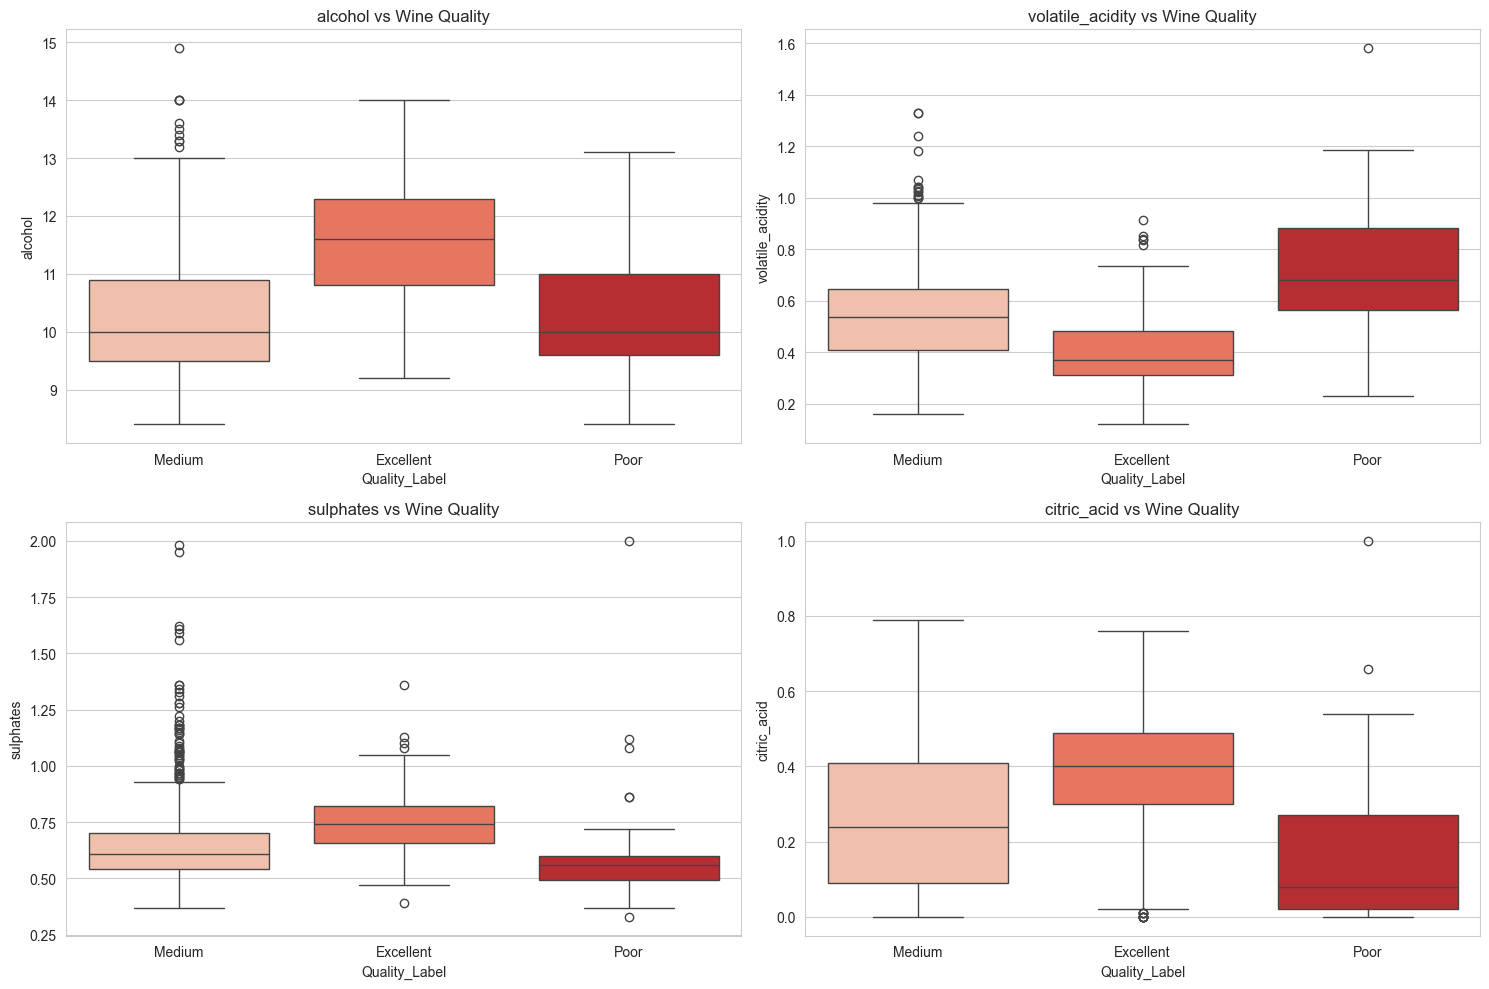

In [11]:
features_to_compare = ['alcohol', 'volatile_acidity', 'sulphates', 'citric_acid']

plt.figure(figsize=(15,10))
for i, feature in enumerate(features_to_compare, 1):
    plt.subplot(2,2,i)
    sns.boxplot(x='Quality_Label', y=feature, data=df, palette='Reds')
    plt.title(f"{feature} vs Wine Quality")
plt.tight_layout()
plt.show()


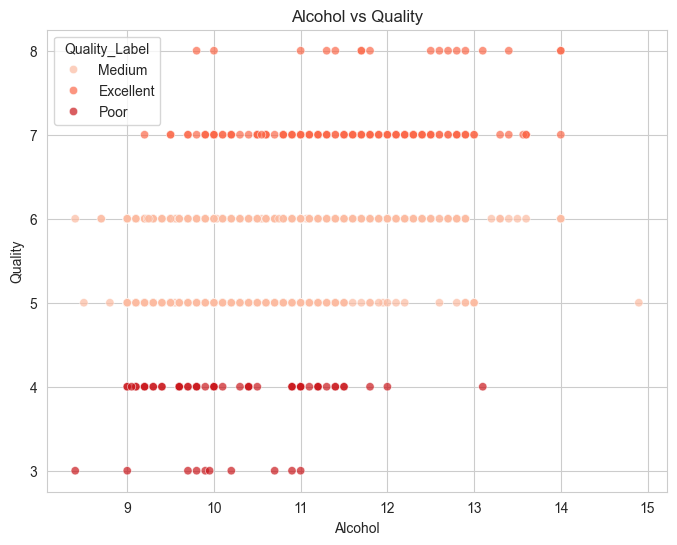

In [12]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='quality', hue='Quality_Label', data=df, palette='Reds', alpha=0.7)
plt.title("Alcohol vs Quality")
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.show()


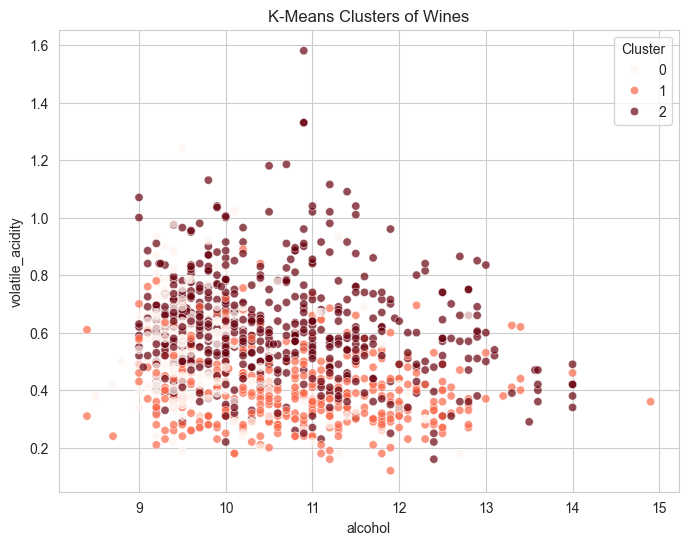

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Scale features
X_scaled = StandardScaler().fit_transform(df.drop(['quality','Quality_Label'], axis=1))

# K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_scaled)
df['Cluster'] = clusters

# Visualize cluster distribution
plt.figure(figsize=(8,6))
sns.scatterplot(x='alcohol', y='volatile_acidity', hue='Cluster', data=df, palette='Reds', alpha=0.7)
plt.title("K-Means Clusters of Wines")
plt.show()
